<h1 align="center"> <b>Курсова робота</b> </h1>
<h3 align="center"> <em><b>Аналіз даних за допомогою Python та бібліотеки Pandas</b></em> </h3>

---

<p style="text-align:right"><b>Виконав:</b></br>Студент групи ФІ-21, НН ФТІ</p>

<h2 align="center">Частина №1</h2>
<p>Мета: Вивчення основних принципів роботи та використання програмних
компонентів Anaconda. Інсталяція. Дослідження можливостей IPython Notebook.</p>
<h3 align="center">Вступ</h3>
<p>Ipython Notebook — це середовище розробки, що дає можливості для
інтерактивної та ітеративної розробки проектів, пов’язаних з Data Science.
Notebook інтегрує код та результати його виконання в один файл разом з
графіками, текстом, математичними виразами та іншими можливими видами
представлення інформації.</br></br>
JupyterLab - це новітнє інтерактивне веб-середовище для розробки блокнотів, коду та даних. Його гнучкий інтерфейс дозволяє користувачам налаштовувати та організовувати робочі процеси в науці про дані, наукових обчисленнях, комп'ютерній журналістиці та машинному навчанні. Модульна конструкція дозволяє розширювати та збагачувати функціональність.</br></br>
Блокнот (notebook) представляє код і результат його виведення в єдиному документі, який об’єднує візуалізацію, розмічений текст, математичні рівняння та інші мультимедійні дані. Цей інтуїтивно зрозумілий робочий процес сприяє ітеративній і швидкій розробці, що робить ноутбуки все більш популярним вибором для подання даних і їх аналізу. Notebook інтегрує код та результати його виконання в один файл разом з графіками, текстом, математичними виразами та іншими можливими видами представлення інформації.</p>
<h3 align="center">Підготовка до роботи</h3>
<ol>
    <li>Для початку варто завантажити <a href="https://www.anaconda.com/download">Anaconda Distribution</a></li>
    <li>Після завантаження запускаємо <b>Anaconda Poweshell Prompt</b></li>
    <li>За допомогою команди <code>cd Папка1\папка2</code> вибираємо необхідну директорію, а командою <code>[потрібний диск]:</code> змніюємо диск</li>
    <li>Далі створюємо віртуальне середовище командою <code>conda --prefix=[Назва вірутального середовища] python=3.11.5</code></li>
    <li><code>conda activate</code> - активуємо середовище</li>
    <li>Інсталюємо JupyterLab <code>conda install jupyterlab</code></li>
    <li>Командою <code>jupyter lab</code> запускаємо JupyterLab</li>
</ol>
<h3 align="center">Можливості Jupyter Notebook</h3>
<ul>
    <li>Редагувати Python код в браузері, з підсвічуванням синтаксису, автовідступами і автодоповненням</li>
    <li>Запускати код в браузері</li>
    <li>Відображати результати обчислень з медіа представленням(схеми, графіки)</li>
    <li>Працювати з мовою розмітки Markdown і LaTeX</li>
</ul>

Приклад роботи з LaTeX
$$\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

<h2 align="center">Частина №2</h2>
<p>Мета: Отримати досвід використання основних засобів аналізу та візуалізації даних у середовищі IPython Notebook на модельних наборах даних.</br></br>
В роботі використовується публічний набір даних <a href="https://www.kaggle.com/datasets/neuromusic/avocado-prices"><em><b>Avocado Prices</b></em></a>.</p>

>Імпортуємо необхідні бібліотеки

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import math

warnings.filterwarnings('ignore')
print("Setup complete")

Setup complete


> Відкриваємо dataset та виводимо перших 5 рядків

In [2]:
df = pd.read_csv("dataset/avocado.csv", index_col="Unnamed: 0")
df = df.sort_values(by=['Date'])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


> Перевіряємо на наявність порожніх значень

In [3]:
df.isnull().values.any()

False

> Представлення набору даних у матричному вигляді. Відображення 10 елементів для 4-ох ознак Виділення зеленим кольором максимальні елементи в таблиці, а червоним мінімальні для цих 10-ти елементів.

In [4]:
df_matrix_foramt = df.pivot(columns=["region", "type"], index="Date", values="AveragePrice").head(10).sort_values(by=["region"], axis=1)
df_matrix_foramt.style.highlight_max(axis=0, props="background-color:green").\
format('{:.2f}').\
highlight_min(axis=0, props="background-color:red").\
set_table_styles([{'selector': 'th.col_heading', 'props': 'text-align: center;'}], overwrite=False)

> Математичне сподівання та дисперсія

In [5]:
X_ = lambda x: x.sum()/len(x)
disp = lambda x: math.sqrt(sum(x**2)/len(x) - X_(x)**2)
print("Порівння обчисленого матемитичного сподівання за допомгою функції Pandas та формулою:", abs(X_(df["AveragePrice"])-df["AveragePrice"].mean()))
print("Порівння обчисленої дисперсії за допомгою функції Pandas та формулою:", abs(disp(df["AveragePrice"])-df["AveragePrice"].std()))

Порівння обчисленого матемитичного сподівання за допомгою функції Pandas та формулою: 0.0
Порівння обчисленої дисперсії за допомгою функції Pandas та формулою: 1.1032990029635759e-05


> Стандартизування даних

In [6]:
def standartization(df):
    dataframe = df.copy()
    
    df_for_stand_org = dataframe[dataframe["type"]=="organic"].select_dtypes(include='float64')
    df_for_stand_org  = ( df_for_stand_org - df_for_stand_org.mean() )/ df_for_stand_org.std()
    
    df_for_stand_conv = dataframe[dataframe["type"]=="conventional"].select_dtypes(include='float64')
    df_for_stand_conv  = ( df_for_stand_conv - df_for_stand_conv.mean() )/ df_for_stand_conv.std()
    
    standartization_df = dataframe
    
    standartization_df.loc[standartization_df["type"]=="organic", list(df_for_stand_org.columns)] = df_for_stand_org
    standartization_df.loc[standartization_df["type"]=="conventional", list(df_for_stand_org.columns)] = df_for_stand_conv
    return standartization_df


standartization(df[df["region"]=="TotalUS"])

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,-0.815603,-0.394038,0.140141,0.850200,-0.173310,-1.488867,-1.545307,-1.191652,-1.019055,conventional,2015,TotalUS
51,2015-01-04,-0.424313,-1.172483,1.595150,-1.187734,-0.265342,-1.241281,-1.058389,-1.129569,-0.344028,organic,2015,TotalUS
50,2015-01-11,-0.621586,-0.985303,2.303270,-0.612993,-0.403453,-1.330357,-1.094194,-1.311193,-0.344028,organic,2015,TotalUS
50,2015-01-11,-0.471011,-0.763554,-0.188716,0.220000,-0.121089,-1.483014,-1.455734,-1.371772,-1.046200,conventional,2015,TotalUS
49,2015-01-18,-0.621586,-0.841192,1.990425,0.045691,-0.354799,-1.297391,-1.115937,-1.156335,-0.344028,organic,2015,TotalUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2018-03-11,-0.011554,1.097493,0.841265,-0.362563,-0.490414,1.810295,1.987787,1.189334,1.370344,conventional,2018,TotalUS
1,2018-03-18,-0.029766,2.341421,0.420903,1.770658,-1.115006,1.980740,2.086131,0.806406,2.214936,organic,2018,TotalUS
1,2018-03-18,-0.241283,1.250598,0.686744,-0.234344,-0.634891,2.152272,2.132585,1.962947,1.361635,conventional,2018,TotalUS
0,2018-03-25,0.019552,1.958467,-0.514858,0.447878,-1.108654,2.106790,2.370955,0.477257,1.828062,organic,2018,TotalUS


> Візуалізація даних

Text(0.5, 1.0, '(Histplot) ')

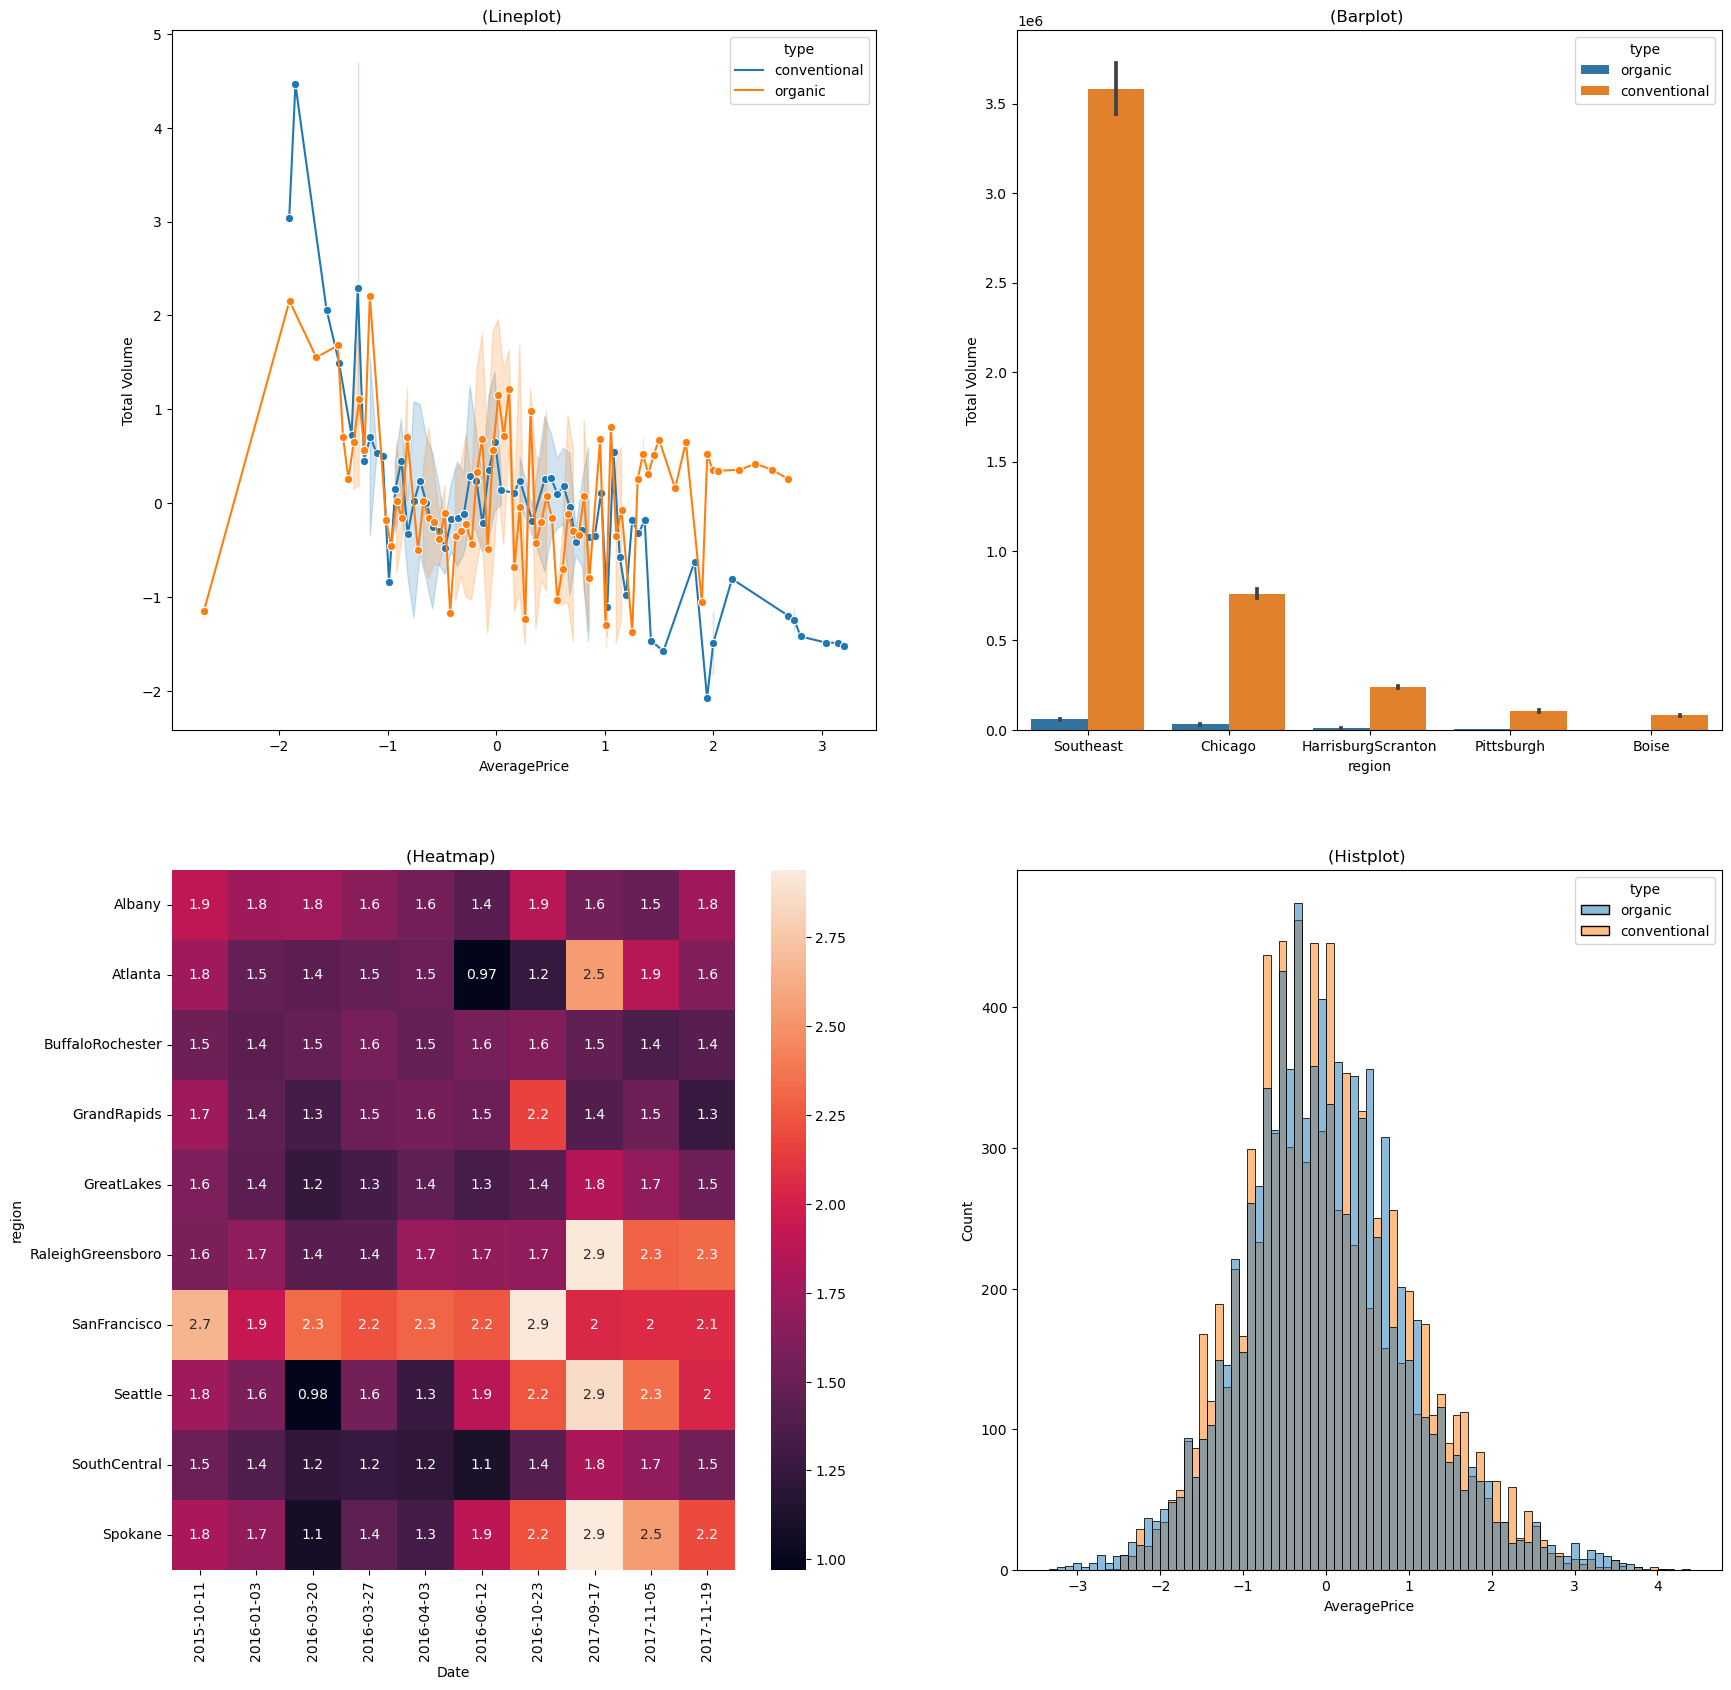

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

sns.lineplot(
    ax = axes[0, 0], data = standartization(df[df["region"]=="TotalUS"]),
    x = "AveragePrice", y = "Total Volume", hue = "type",
    marker = "o"
)
axes[0, 0].set_title("(Lineplot) ")

sns.barplot(
    ax = axes[0, 1], data = df[df["region"].isin(list(df["region"].head()))], x = "region", y = "Total Volume",
    hue = "type"
)
axes[0, 1].set_title("(Barplot) ")

sns.heatmap(
    ax = axes[1, 0], data = df.loc[(df["type"]=="organic")&(df["region"].isin(list(set(list(df["region"])))[:10]))&(df["Date"].isin(list(set(list(df["Date"])))[:10]))].pivot(index="region", columns="Date", values="AveragePrice"),
    annot = True
)
axes[1, 0].set_title("(Heatmap) ")

sns.histplot(
    ax = axes[1, 1], data = standartization(df),
    x = "AveragePrice", stat = "count", hue = "type"
)
axes[1, 1].set_title("(Histplot) ")